In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

#import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
#(in order to see the graph of code within the editor, we put the following statement)
%matplotlib inline

import seaborn as sns
sns.set(style= "white", color_codes=True)
sns.set(font_scale=1.5)

#Load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import  make_regression

#import Machine Learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer


#importing libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA

In [2]:
#Week1
#data Exploration

In [7]:
#Reading a csv file into a pandas dataframe
df = pd.read_csv('health care diabetes.csv')

In [8]:
#1

In [9]:
#viewing the data frame, 1st 5 rows
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#viewing the bottom 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
#checking the dimension of the dataset
df.shape #i have 768 rows and 9 culumns

(768, 9)

In [12]:
#checking type of data
type(df)

pandas.core.frame.DataFrame

In [13]:
df.info()#i have 7 intigers and 2 floats datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
#checking the sum of NAN values for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#checking if we have any missing values at all
df.isnull().values.any()

False

In [16]:
#checking total number of missing values
df.isnull().sum().sum()

0

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
#in the table above i notice that the min value of most columns is zero, but it doesnt make sense for
#Glucose, Blood pressure, skin Thickness,insulin and BMI to be zero. so i sense some missing values

In [19]:
#replacing missing values that are recorded as zero with nan
df['Glucose'].replace(0, np.nan, inplace= True)
df['BloodPressure'].replace(0, np.nan, inplace= True)
df['SkinThickness'].replace(0, np.nan, inplace= True)
df['Insulin'].replace(0, np.nan, inplace= True)
df['BMI'].replace(0, np.nan, inplace= True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
SkinThickness               541 non-null float64
Insulin                     394 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [21]:
#Again checking if we have any missing values at all
df.isnull().values.any()

True

In [22]:
#Again checking total number of missing values
df.isnull().sum().sum()

652

In [23]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
#checking % of NAN values for each column
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Insulin,374,48.7
SkinThickness,227,29.6
BloodPressure,35,4.6
BMI,11,1.4
Glucose,5,0.7


In [25]:
#now i can see the null values

In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
#2

In [28]:
#now i can decide wether to fill the NAN values with mean,mode or median

In [29]:
#Checking for outliers, if will it be best to fill null with  mean, if there are no outliers
df.plot.box()

In [30]:
#i see outliers, so its risky to replace nan values with average value
#so i rather replace the nan values with the median

In [31]:
sns.boxplot(x=df['Glucose'])

In [32]:
sns.boxplot(x=df['BloodPressure'])

In [33]:
sns.boxplot(x=df['SkinThickness'])

In [34]:
sns.boxplot(x=df['Insulin'])

In [35]:
sns.boxplot(x=df['BMI'])

In [36]:
#exploring the distribution of the viriable
df.hist(figsize = (10, 10))

In [38]:
df.hist(column='Glucose')

In [39]:
df.hist(column='BloodPressure')

In [40]:
df.hist(column='SkinThickness')

In [41]:
df.hist(column='Insulin')

In [42]:
df.hist(column='BMI')

In [43]:
#replacing the NAN values with median


In [44]:
#checking median of each column
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [45]:
#Median Imputation
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [46]:
#Changing variables back to their original data types
df['Glucose'] = df['Glucose'].astype(np.int64)
df['BloodPressure'] = df['BloodPressure'].astype(np.int64)
df['SkinThickness'] = df['SkinThickness'].astype(np.int64)
df['Insulin'] = df['Insulin'].astype(np.int64)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
#3

In [49]:
#Creating a count plot

In [50]:
df.dtypes.value_counts().to_frame('count') #there are 2 datatypes int64(7) and float64(2)

,count
int64,7
float64,2


Text(0.5, 1.0, 'data-types of variables')

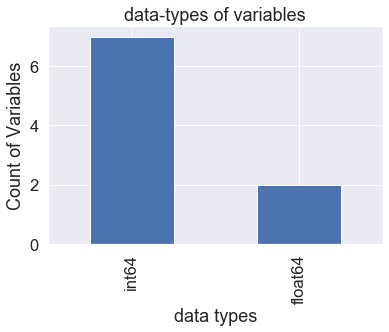

In [51]:
df.dtypes.value_counts().plot(kind='bar')
plt.xlabel('data types')
plt.ylabel('Count of Variables')
plt.title('data-types of variables')#i can visualy see that out of 9 variables there are 2 datatypes int64(7) and float64(2) 

# Week 2
# Data Exploration

In [53]:
#1


In [54]:
df['Outcome'].value_counts().to_frame('Count')

,Count
0,500
1,268


Text(0.5, 1.0, 'count of outcomes by their value')

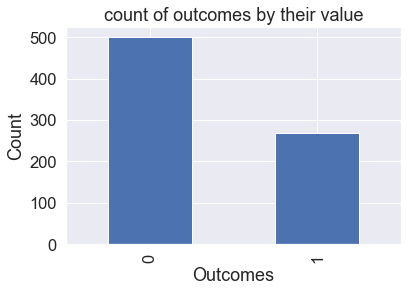

In [55]:
df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcomes')
plt.ylabel('Count')
plt.title('count of outcomes by their value')
#this means out of the 768 patients, 268 patients in the dataset are diabetic, and the rest(500) are -
#non-diabrtic

In [56]:
#2

In [57]:
sns.pairplot(df)
#DiabetesPedigreeFunction has the weekest correlation almost on all other variables, because there is
#no strong pattern, its all over/scattered

In [58]:
#BMI and Skin thicknes

In [59]:
#3
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [60]:
plt.figure(figsize=(10,6))
correlations = df.corr()
sns.heatmap(data = correlations,square = True,annot=True, cmap = "bwr")
plt.yticks(rotation=0),
plt.xticks(rotation=90)

In [ ]:
#Week3
#Data Modeling

In [ ]:
#1 im going to use all feature variables(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,
#DiabetesPedigreeFunction, Age.)
#i will divide the dataset into features variables and target variable.

In [62]:
#Creating feature variables = x
X = df.drop('Outcome', axis=1)
#creating target variable = y
y = df['Outcome']

In [63]:
#spliting the dataset as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [64]:
#checking the shape of train and test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [ ]:
#Logistic Regression:
#Used to estimate discrete values (binary values like 0/1, yes/no, true/false ) based on given set of-
#independent variable. in my data i have descrete values, so Logistic regression is apropriate algorithm

In [ ]:
#instantiate and train the classifier using this code
LogReg = LogisticRegression()

In [ ]:
#applying logistic regression to x train and y train
LogReg.fit(X_train,y_train)

In [ ]:
#storing the prediction given by the classifier in the y_pred variable
y_pred = LogReg.predict(X_test)

In [ ]:
acc_LogReg = round(LogReg.score(X_train, y_train) * 100)
print(round(acc_LogReg), "%")

In [ ]:
#KNN

In [ ]:
KNC = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNC.fit(X_train,y_train)

In [ ]:
y_predictions = KNC.predict(X_test)

In [ ]:
acc_KNC = round(KNC.score(X_train, y_train) * 100)
print(round(acc_KNC), "%")

In [ ]:
#RandomForest

In [ ]:
RFC = RandomForestClassifier(n_estimators=100)

In [ ]:
RFC.fit(X_train, y_train)

In [ ]:
Y_pred = RFC.predict(X_test)

In [ ]:
RFC.score(X_train, y_train)

In [ ]:
acc_RFC = round(RFC.score(X_train, y_train) * 100)
print(round(acc_RFC), "%")

In [ ]:
scores = cross_val_score(RFC, X_train, y_train, cv=10, scoring = 'accuracy')

In [ ]:
print ('Scores:', scores)
print ('Mean:', scores.mean())
print ('Standard Deviation:', scores.std())
#from the results i can tell that my model has an average accuracy of 78% with a std of 4%

In [ ]:
#Support Vector Machines

In [ ]:
SVMC = SVC(kernel='rbf', gamma='auto')

In [ ]:
SVMC.fit(X_train, y_train)

In [ ]:
Y_P = SVMC.predict(X_test)

In [ ]:
acc_SVMC = round(SVMC.score(X_train, y_train) * 100)
print(round(acc_SVMC), "%")

In [ ]:
#Decision Tree

In [ ]:
DTC = tree.DecisionTreeClassifier()

In [ ]:
DTC.fit(X_train, y_train)

In [ ]:
Y_Prediction = DTC.predict(X_test)

In [ ]:
acc_DTC = round(DTC.score(X_train, y_train) * 100)
print(round(acc_DTC), "%")

In [ ]:
#comparing various models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',
              'Random Forest', 'Support Vector Machines', 
              'Decision Tree'],
    'Score': [acc_LogReg, acc_KNC,
              acc_RFC, acc_SVMC,
              acc_DTC]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

In [ ]:
#Week4
#Data Modeling

In [ ]:
#

In [ ]:
#for logistic
#Creating a classification report
print(classification_report(y_test,y_pred))

In [ ]:
#computing the confusion metrics to evaluate the accuracy of classification
Conf_mat = confusion_matrix(y_test,y_pred)
print(Conf_mat)

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(Conf_mat, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted') #TP+TN/Total-> 42+128= 170/231 = 0.735..

In [ ]:
#intepreting these results
# 0.7359307359307359 of patients being classified correctly
print( 'accuracy score :',metrics.accuracy_score(y_test,y_pred))
print('precision score :',metrics.precision_score(y_test,y_pred))

In [ ]:
#futher checking our algorithms predicted propabilities, using the X_test value
LogReg.predict_proba(X_test)

In [ ]:
y_pred_proba = LogReg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test,y_pred_proba)

In [ ]:
#ploting AUC and roc curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label = 'LogReg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Reg ROC curve')
plt.show()

In [ ]:
#for Knn
#Creating a classification report
print(classification_report(y_test,y_predictions))

In [ ]:
#computing the confusion metrics to evaluate the accuracy of classification
Conf_mat_KNN = confusion_matrix(y_test,y_predictions)
print(Conf_mat_KNN)

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(Conf_mat_KNN, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted') #TP+TN/Total-> 46+120= 166/231=0.718...

In [ ]:
#intepreting these results
#  0.7186147186147186 of patients being classified correctly
print( 'accuracy score :',metrics.accuracy_score(y_test,y_predictions))
print('precision score :',metrics.precision_score(y_test,y_predictions))

In [ ]:
#futher checking our algorithms predicted propabilities, using the X_test value
KNC.predict_proba(X_test)

In [ ]:
y_predictions_proba = KNC.predict_proba(X_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test,y_predictions_proba) 

In [ ]:
#ploting AUC and roc curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label = 'KNC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('neigh(n_neighbors =11) ROC curve')
plt.show()

In [ ]:
#for random forest
#Creating a classification report
print(classification_report(y_test,Y_pred))

In [ ]:
#computing the confusion metrics to evaluate the accuracy of classification
Conf_mat_RF = confusion_matrix(y_test,Y_pred)
print(Conf_mat_RF)

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(Conf_mat_RF, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted') #TP+TN/Total->45+120= 165/231=0.714...

In [ ]:
#intepreting these results
# 0.7142857142857143 of patients being classified correctly
print( 'accuracy score :',metrics.accuracy_score(y_test,Y_pred))
print('precision score :',metrics.precision_score(y_test,Y_pred))

In [ ]:
RFC.predict_proba(X_test)

In [ ]:
Y_pred_proba = RFC.predict_proba(X_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test,Y_pred_proba) 

In [ ]:
#ploting AUC and roc curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label = 'RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Random Forest ROC curve')
plt.show()

In [ ]:
#for Decision Tree
#Creating a classification report
print(classification_report(y_test,Y_Prediction))

In [ ]:
#computing the confusion metrics to evaluate the accuracy of classification
Conf_mat_DT = confusion_matrix(y_test,Y_Prediction)
print(Conf_mat_DT)

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(Conf_mat_DT, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted') #TP+TN/Total-> 40+117= 157/231= 0.679...

In [ ]:
#intepreting these results
#  0.6796536796536796  of patients being classified correctly
print( 'accuracy score :',metrics.accuracy_score(y_test,Y_Prediction))
print('precision score :',metrics.precision_score(y_test,Y_Prediction))

In [ ]:
DTC.predict_proba(X_test)

In [ ]:
Y_Prediction_proba = DTC.predict_proba(X_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test,Y_Prediction_proba) 

In [ ]:
#ploting AUC and roc curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr,label = 'DTC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree curve')
plt.show()

In [ ]:
#Saving my cleaned dataset to
df.to_excel("Health_care_diabetes.xlsx", index=False)

In [ ]:
#Saving my cleaned dataset to
df.to_csv('df.csv', index=False)